In [284]:
import pandas as pd
import re
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.simplefilter('ignore')

In [285]:
df = pd.read_csv('credit_test.csv' , index_col = 'Loan ID')
df

,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan ID,,,,,,,,,,,,,,,,,
f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 10353 entries, f738779f-c726-40dc-92cf-689d73af533d to nan
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   10000 non-null  object 
 1   Current Loan Amount           10000 non-null  float64
 2   Term                          10000 non-null  object 
 3   Credit Score                  8019 non-null   float64
 4   Annual Income                 8019 non-null   float64
 5   Years in current job          9573 non-null   object 
 6   Home Ownership                10000 non-null  object 
 7   Purpose                       10000 non-null  object 
 8   Monthly Debt                  10000 non-null  float64
 9   Years of Credit History       10000 non-null  float64
 10  Months since last delinquent  4694 non-null   float64
 11  Number of Open Accounts       10000 non-null  float64
 12  Number of Credit Problems     10

(10353, 17)

In [287]:
#DUPLICATES
df.duplicated().sum()

352

In [288]:
#missing values
df.isna().sum()

Customer ID                      353
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [289]:
df.dtypes

Customer ID                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [290]:
columns = df.columns
for column in columns:
  nn = df[column].unique()
  sum = len(nn)
  text = colored(column, 'red', attrs=['reverse', 'blink'])  
  print('The Unique Values Of The Column {} are {} and their sum is {}\n'.format(text , nn , sum))  

The Unique Values Of The Column Customer ID are ['ded0b3c3-6bf4-4091-8726-47039f2c1b90'
 '1630e6e3-34e3-461a-8fda-09297d3140c8'
 '2c60938b-ad2b-4702-804d-eeca43949c52' ...
 'f90cf410-a34b-49e7-8af9-2b405e17b827'
 'f1838fa9-7ad9-44d5-97a6-7a6d3f3529d7' nan] and their sum is 10001

The Unique Values Of The Column Current Loan Amount are [611314. 266662. 153494. ... 132550. 223212.     nan] and their sum is 6787

The Unique Values Of The Column Term are ['Short Term' 'Long Term' nan] and their sum is 3

The Unique Values Of The Column Credit Score are [ 747.  734.  709.  727.  744.  741.  733.   nan  736.  683.  723.  680.
  696.  729.  742.  715.  722.  740.  708.  705.  738.  717.  706. 6470.
  712.  704.  646.  682.  713.  716.  649.  688.  702.  674.  746.  719.
  707.  726. 7440.  731.  751.  685.  721. 7110.  652.  748.  667.  743.
  690. 7150.  701.  730.  697.  699.  648.  673.  749.  657. 6640.  725.
  675.  720.  728.  724.  695.  643.  745.  714.  737.  606.  634.  735.
  710. 

<font color = 'blue' size = '10'> Cleaning: </font>

In [291]:
#get rid of completely missing rows
df.dropna(how = 'all' , inplace = True)
df.shape

(10000, 17)

In [292]:
#checking every column
df.isna().sum()

Customer ID                        0
Current Loan Amount                0
Term                               0
Credit Score                    1981
Annual Income                   1981
Years in current job             427
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5306
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      22
Tax Liens                          1
dtype: int64

In [293]:
df['Credit Score'].describe()
df['Credit Score'].mode()

0    747.0
Name: Credit Score, dtype: float64

In [294]:
#getting rid of the out-of-range data in credit score (possible values: 300 <= Credit Score <= 850 only)
df[(df['Credit Score'] < 300) | (df['Credit Score'] > 850)]['Credit Score'].unique()

array([6470., 7440., 7110., 7150., 6640., 7350., 7400., 7030., 7070.,
       7450., 6620., 7280., 6170., 6400., 6980., 6600., 7210., 7480.,
       7040., 7250., 6880., 7190., 7180., 7340., 6330., 6450., 7300.,
       7260., 7130., 6830., 6680., 7100., 6550., 7360., 7050., 6270.,
       7230., 7290., 6750., 6720., 6850., 6790., 7240., 7330., 6780.,
       6930., 6890., 7320., 7420., 6870., 7200., 7390., 7270., 7220.,
       6960., 7010., 6940., 7470., 6900., 6770., 6300., 6820., 6710.,
       7410., 5880., 7170., 6670., 6480., 6630., 6660., 6970., 7310.,
       7460., 7370., 7380., 7120., 6910., 7500., 7090., 6920., 7020.,
       6950., 6440., 6730., 7430., 6570., 6520., 7000., 6530., 6000.,
       7060., 6200., 6760., 7080., 6690., 6700., 6490., 7160., 6120.,
       6990., 6860., 6840., 6540., 6800., 7490., 6010., 7140., 6560.,
       6070., 6240., 6810., 7510.])

In [295]:
#removing zero from the right in out-of-range data
tenx = df.loc[df['Credit Score'] > 850 , 'Credit Score' ]
normal = tenx / 10
df.loc[df['Credit Score'] > 850 , 'Credit Score'] = normal
df['Credit Score'].describe()

count    8019.000000
mean      716.631251
std        28.233359
min       585.000000
25%       704.000000
50%       723.000000
75%       739.000000
max       751.000000
Name: Credit Score, dtype: float64

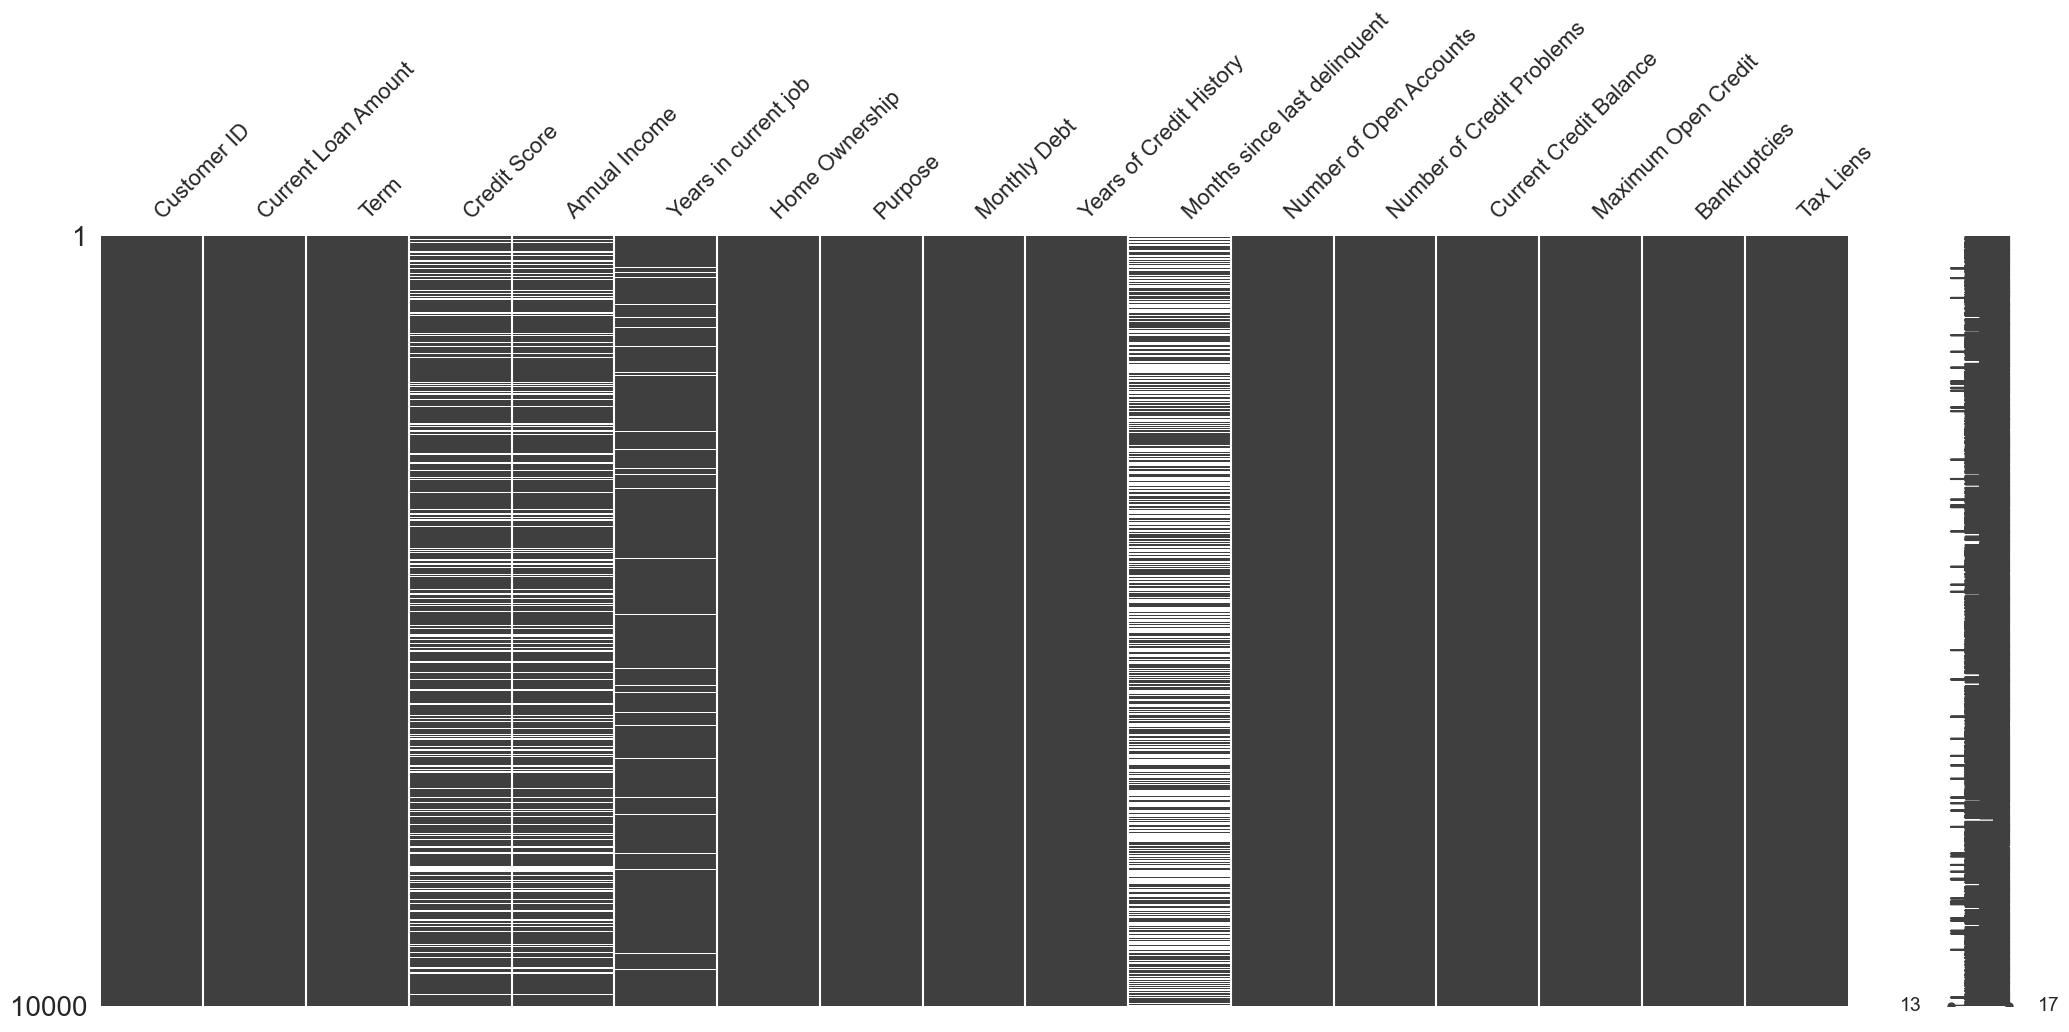

In [296]:
#graphin missing values
msno.matrix(df)
plt.show()

In [297]:
#removing missing values in credit score
mean = df['Credit Score'].mean()
df['Credit Score'] = df['Credit Score'].fillna(mean)
df['Credit Score'].isna().sum()

0

In [298]:
#removing missing values in Annual Income
mean = df['Annual Income'].mean()
df['Annual Income'] = df['Annual Income'].fillna(mean)
df['Annual Income'].isna().sum()

0

In [299]:
#missing values in Months since last delinquent
df['Months since last delinquent'] = df['Months since last delinquent'].fillna("haven't ever been delinquent")
# df['Months since last delinquent'].isna().sum()
df['Months since last delinquent'].unique()

array(["haven't ever been delinquent", 10.0, 27.0, 44.0, 56.0, 52.0, 64.0,
       21.0, 8.0, 29.0, 25.0, 47.0, 68.0, 55.0, 15.0, 18.0, 6.0, 32.0,
       46.0, 38.0, 69.0, 13.0, 37.0, 11.0, 53.0, 2.0, 71.0, 26.0, 74.0,
       40.0, 48.0, 34.0, 7.0, 43.0, 20.0, 14.0, 9.0, 66.0, 76.0, 39.0,
       78.0, 36.0, 19.0, 82.0, 16.0, 5.0, 77.0, 33.0, 51.0, 23.0, 28.0,
       12.0, 61.0, 45.0, 72.0, 49.0, 41.0, 65.0, 17.0, 42.0, 50.0, 73.0,
       35.0, 57.0, 22.0, 67.0, 30.0, 59.0, 3.0, 31.0, 24.0, 58.0, 62.0,
       0.0, 54.0, 1.0, 60.0, 75.0, 4.0, 79.0, 63.0, 80.0, 70.0, 81.0,
       87.0, 83.0, 107.0, 88.0, 131.0, 86.0], dtype=object)

In [300]:
#adjasting date type in Years in current job

df['Years in current job'].dtype
df['Years in current job'] = df['Years in current job'].str.replace(r'< 1', '0' , regex = True)
df['Years in current job'] = df['Years in current job'].str.replace(r'\D+', '' , regex = True)
df['Years in current job'] = df['Years in current job'].astype('float')
df['Years in current job'].unique()

array([10.,  2.,  1.,  0.,  5.,  7.,  3.,  6.,  8.,  4., nan,  9.])

In [301]:
#fixing nan in Years in current job
min = df['Years in current job'].min()
df['Years in current job'] = df['Years in current job'].fillna(min)
# df['Years in current job'].isna().sum()
df['Years in current job'] = df['Years in current job'].astype('int')
df['Years in current job'].unique()

array([10,  2,  1,  0,  5,  7,  3,  6,  8,  4,  9])

In [302]:
df[['Bankruptcies','Tax Liens']].mode()

,Bankruptcies,Tax Liens
0,0.0,0.0


In [303]:
df[['Bankruptcies','Tax Liens']] =  df[['Bankruptcies','Tax Liens']].fillna(0)
df[['Bankruptcies','Tax Liens']] = df[['Bankruptcies','Tax Liens']].astype('int')
# df[['Bankruptcies','Tax Liens']].isna().sum()
df[['Bankruptcies','Tax Liens']].dtypes

Bankruptcies    int32
Tax Liens       int32
dtype: object

In [304]:
#fixing unique values in home ownership
df['Home Ownership'] = df['Home Ownership'].replace({'HaveMortgage': 'Home Mortgage'})
df['Home Ownership'].unique()

array(['Home Mortgage', 'Rent', 'Own Home'], dtype=object)

In [305]:
#fixing unique values in Purpose 
df['Purpose'] = df['Purpose'].replace({'Take a Trip': 'vacation' , 'Other' : 'other' ,  'Buy House' : 'major_purchase',  'Buy a Car' : 'major_purchase'})
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Home Improvements',
       'Business Loan', 'vacation', 'small_business', 'Medical Bills',
       'major_purchase', 'Educational Expenses', 'moving', 'wedding',
       'renewable_energy'], dtype=object)

In [306]:
#fixing data type of Years of Credit History
df[['Years of Credit History' , 'Number of Open Accounts' , 'Number of Credit Problems']] =\
df[['Years of Credit History' , 'Number of Open Accounts' , 'Number of Credit Problems']].astype('int')
df[['Years of Credit History' , 'Number of Open Accounts' , 'Number of Credit Problems']].dtypes

Years of Credit History      int32
Number of Open Accounts      int32
Number of Credit Problems    int32
dtype: object

<font color = 'blue' size = '10'> Visualization:</font>

In [307]:
df.columns

Index(['Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

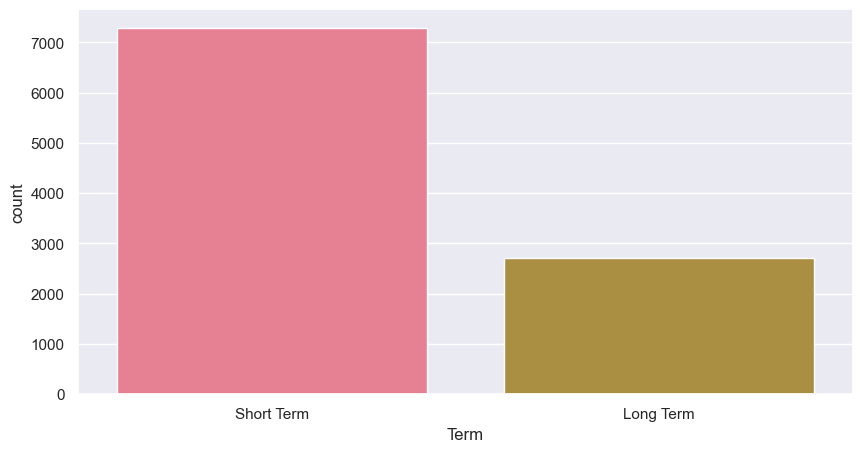

In [308]:
#the most common Term
sns.countplot(data = df , x= 'Term')
plt.show()

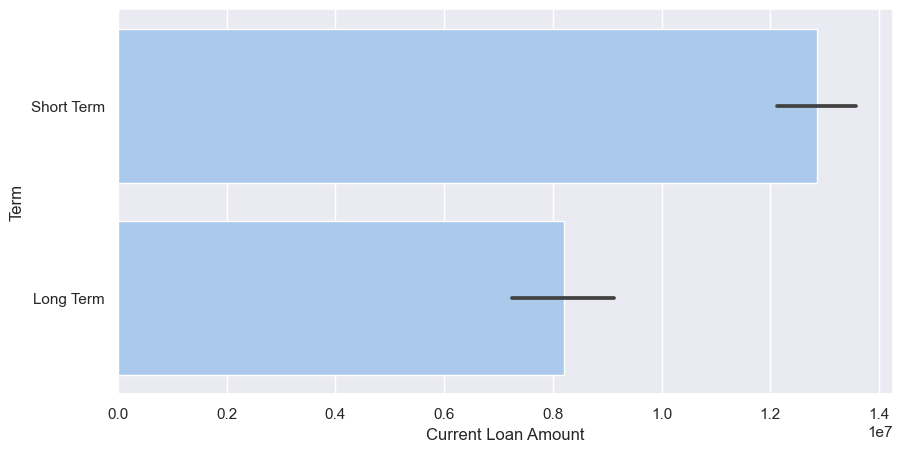

In [309]:
#relation between Term and current loan amount
# loan_median = df.groupby('Term')['Current Loan Amount'].median()
sns.set_color_codes("pastel")
sns.barplot(x="Current Loan Amount", y="Term", data= df,
            color="b")
plt.show()

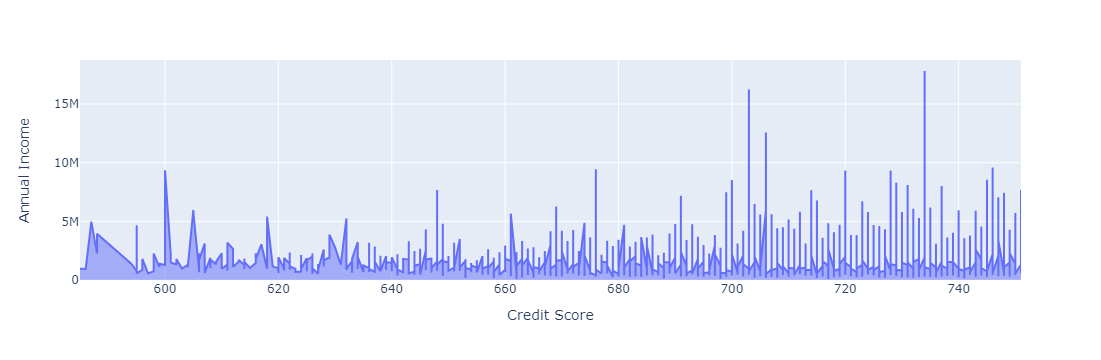

In [310]:
#credit score and annual income
fig = px.area(df, x="Credit Score", y="Annual Income")
fig.show()

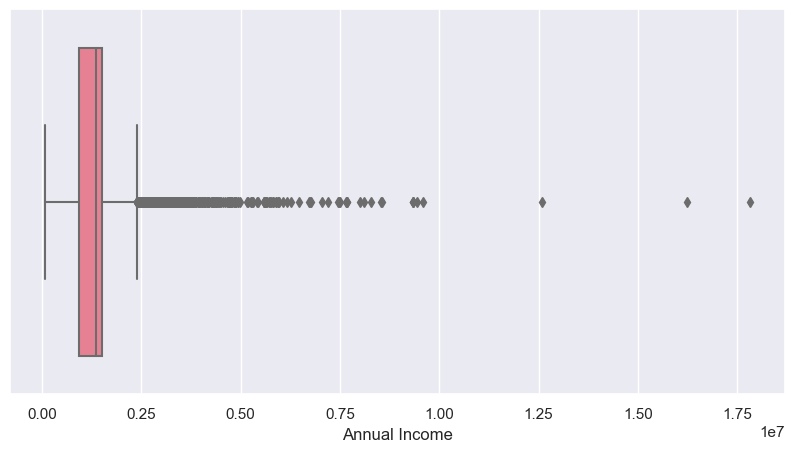

In [311]:
#averae annual income
sns.boxplot(df , x = 'Annual Income')
plt.show()

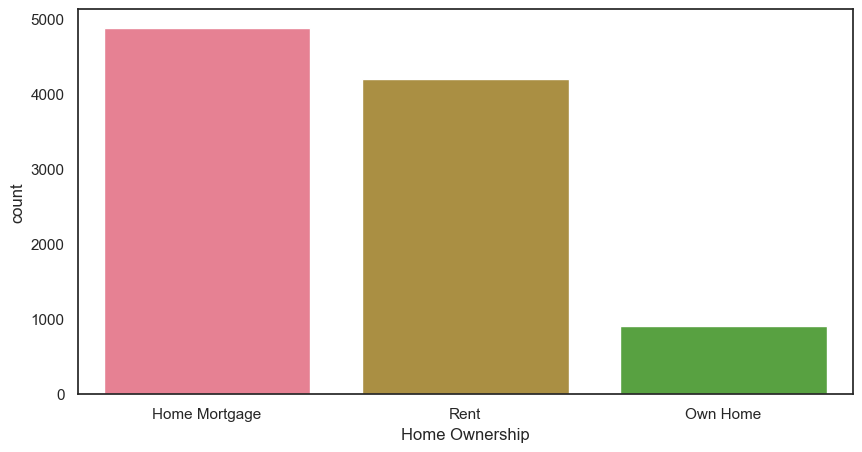

In [312]:
sns.set_theme(style="white", palette=None)
sns.countplot(data = df , x= 'Home Ownership')

plt.show()

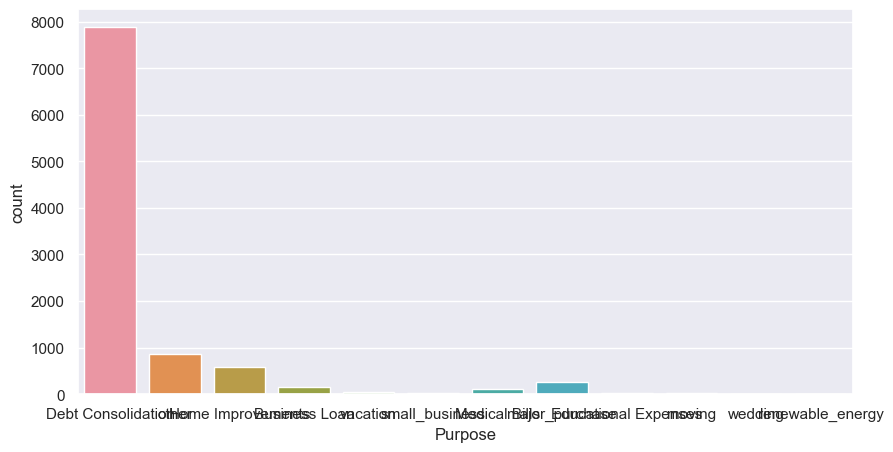

In [313]:
sns.set_theme(style="darkgrid")
sns.countplot(data = df , x= 'Purpose')
sns.set(rc={'figure.figsize':(21,8)})
plt.show()

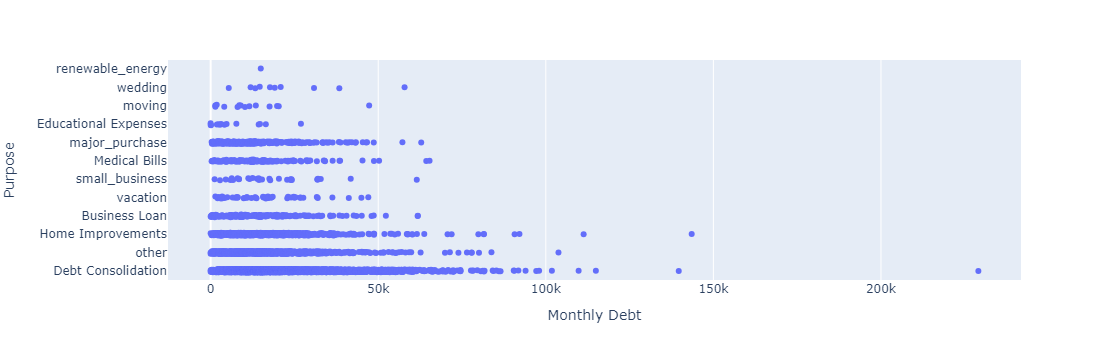

In [314]:
#the monthly dept for every purpose
fig = px.strip(df, x="Monthly Debt", y="Purpose" )
fig.show()

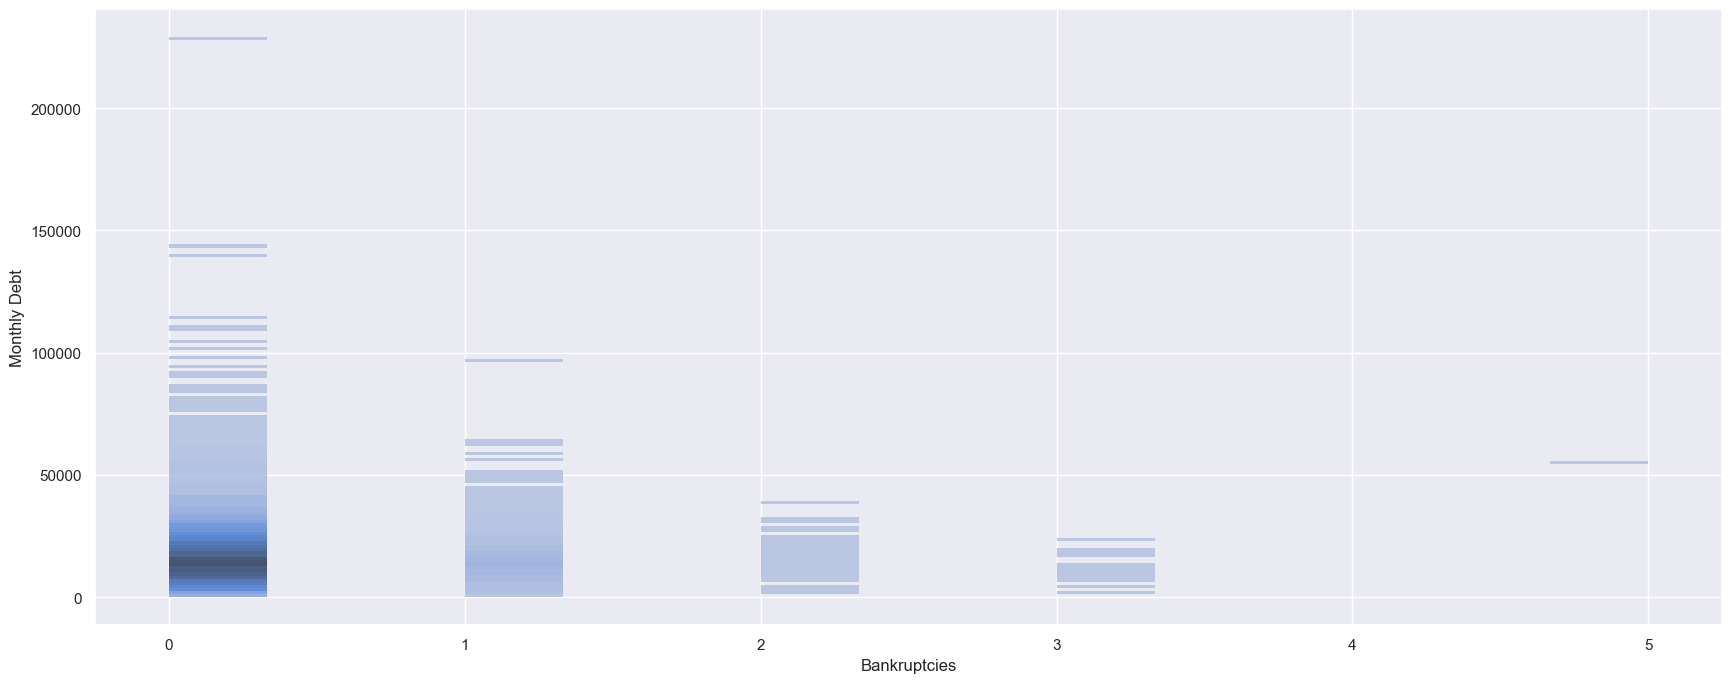

In [315]:
sns.histplot(data= df , x='Bankruptcies' , y = 'Monthly Debt' , palette = "flare")
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

In [316]:
df['Years in current job'].value_counts()

Years in current job
10    3085
0     1222
2      916
3      866
5      696
1      648
4      613
6      566
7      554
8      472
9      362
Name: count, dtype: int64

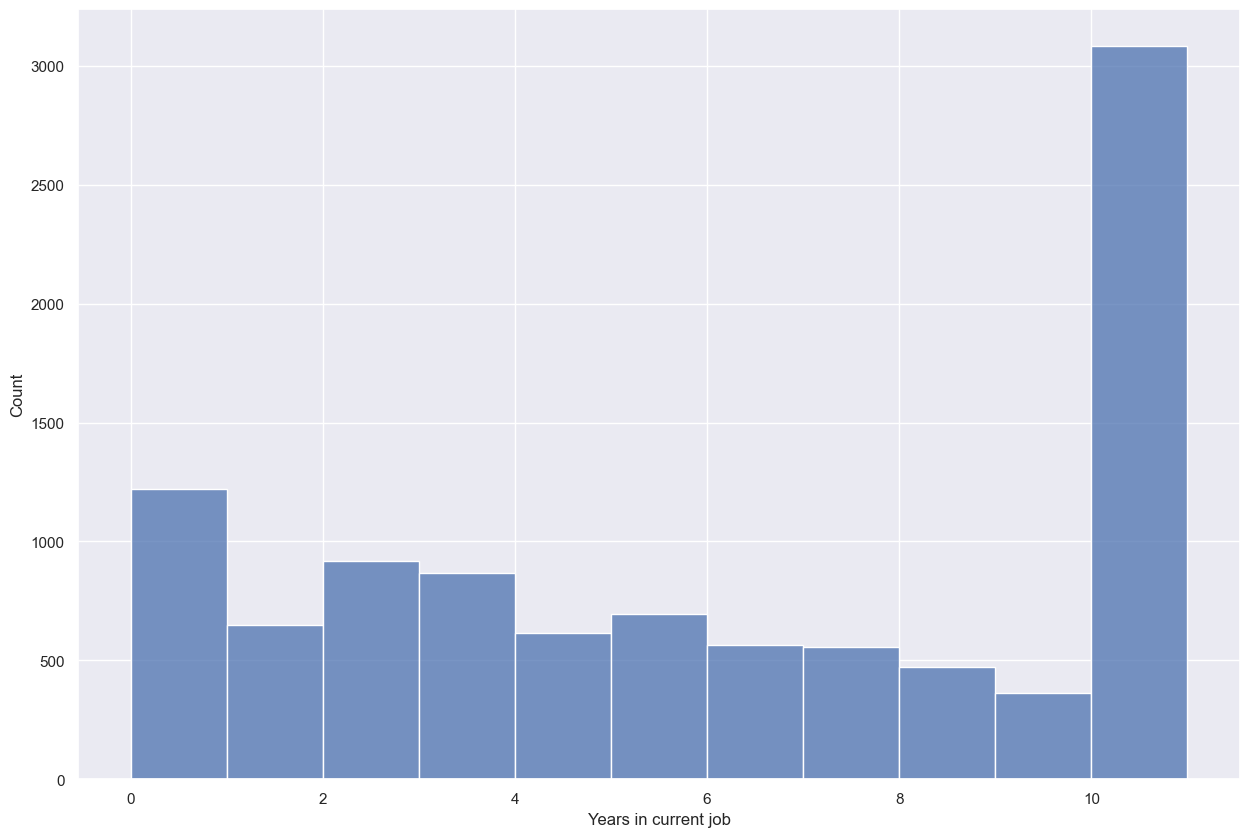

In [317]:
sns.histplot(df , x = 'Years in current job'  ,binwidth = 1 , binrange = (0 , 11)  )
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

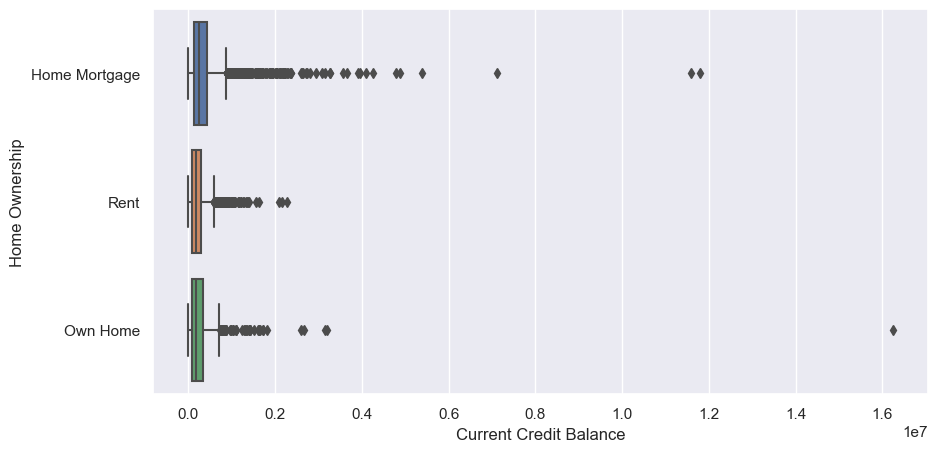

In [318]:
sns.boxplot(df , x='Current Credit Balance' , y = 'Home Ownership')
plt.show()

In [319]:
labels = ["short" , "middle" ,"long" , "very old"]
max = df["Years of Credit History"].max()
bins = [0, 10 , 20 , 30 , max]
df["ych_Category"] = pd.cut(df["Years of Credit History"], 
labels=labels, 
bins=bins)
df[["ych_Category", "Years of Credit History"]]

,ych_Category,Years of Credit History
Loan ID,,
f738779f-c726-40dc-92cf-689d73af533d,long,21
6dcc0947-164d-476c-a1de-3ae7283dde0a,middle,19
f7744d01-894b-49c3-8777-fc6431a2cff1,middle,12
83721ffb-b99a-4a0f-aea5-ef472a138b41,middle,16
08f3789f-5714-4b10-929d-e1527ab5e5a3,long,26
...,...,...
c4ab66f9-833c-43b8-879c-4f8bcb64dd14,middle,12
bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,short,9
da9870de-4280-46a3-8fc6-91cfe5bfde9d,long,27


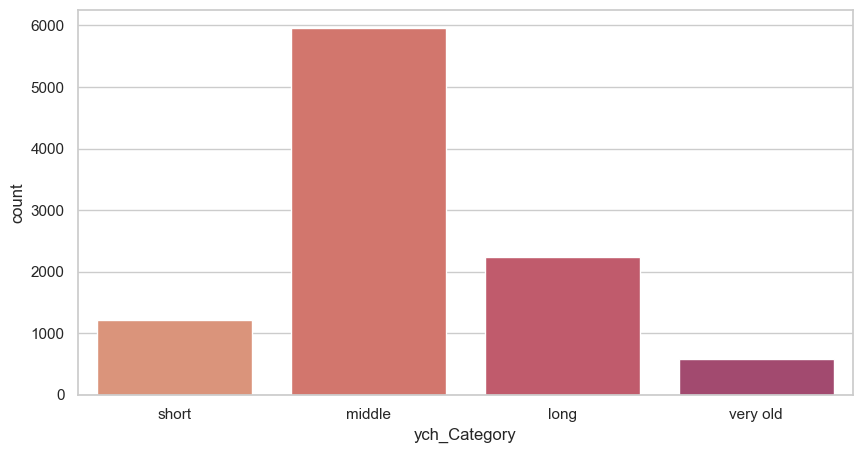

In [320]:
sns.set_theme(palette="flare" , style = 'whitegrid')
sns.countplot(df , x = 'ych_Category')
plt.show()

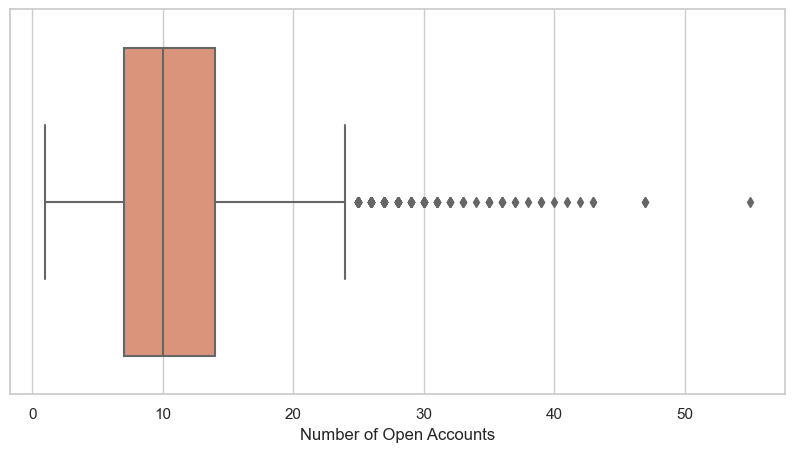

In [321]:
sns.boxplot(df , x = 'Number of Open Accounts')
plt.show()

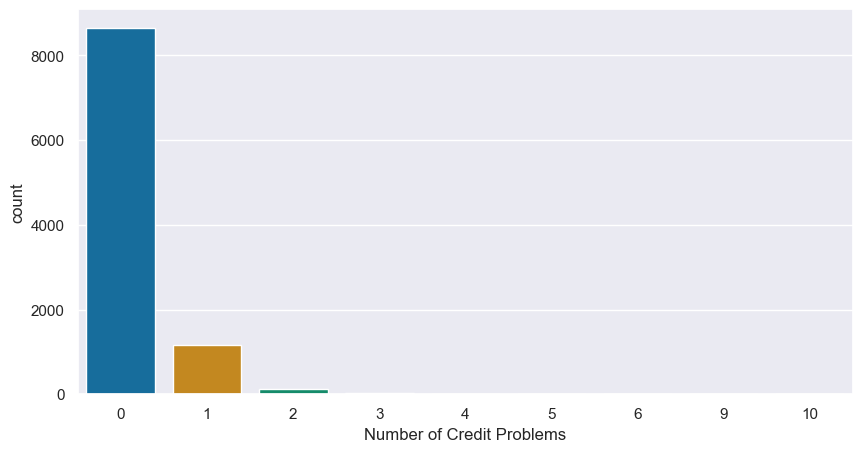

In [323]:
sns.set_theme(palette="colorblind" , style = 'darkgrid')
sns.countplot(df , x = 'Number of Credit Problems')
plt.show()